In [4]:
import numpy as np
import matplotlib.pyplot as plt
import models

In [5]:
# Data: [city, price, sales/week]
data = np.array([
    [1,  0.59, 3980],
    [2,  0.80, 2200],
    [3,  0.95, 1850],
    [4,  0.45, 6100],
    [5,  0.79, 2100],
    [6,  0.99, 1700],
    [7,  0.90, 2000],
    [8,  0.65, 4200],
    [9,  0.79, 2440],
    [10, 0.69, 3300],
    [11, 0.79, 2300],
    [12, 0.49, 6000],
    [13, 1.09, 1190],
    [14, 0.95, 1960],
    [15, 0.79, 2760],
    [16, 0.65, 4330],
    [17, 0.45, 6960],
    [18, 0.60, 4160],
    [19, 0.89, 1990],
    [20, 0.79, 2860],
    [21, 0.99, 1920],
    [22, 0.85, 2160]
])

x = data[:, 1]
y = data[:, 2]

In [6]:
# ======= Linear Regression (y = ax + b) =======
A1, b1 = models.generate_matrices(data[:, 1:], degree=1)  # Only Price & Sales columns

# Modelos
theta_ls1 = models.least_squares(A1, b1)
theta_gd1 = models.gradient_descent(A1, b1, lr=0.01, max_iter=1000)

# Valores de prediccion
y_ls1 = A1 @ theta_ls1
y_gd1 = A1 @ theta_gd1

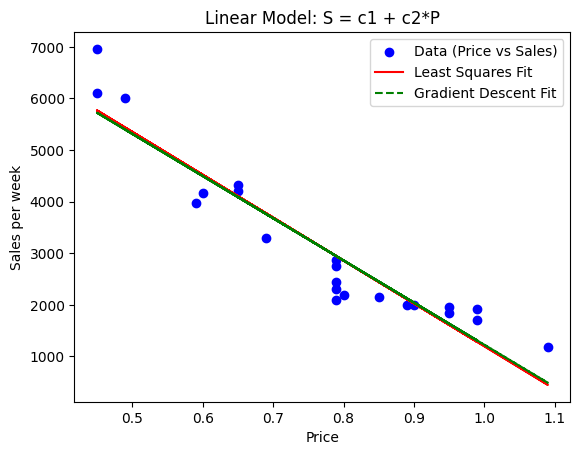

In [7]:
# ======= Plot Results =======
plt.scatter(x, y, color='blue', label="Data (Price vs Sales)")
plt.plot(x, y_ls1, color='red', label="Least Squares Fit")
plt.plot(x, y_gd1, color='green', linestyle="--", label="Gradient Descent Fit")

plt.xlabel("Price")
plt.ylabel("Sales per week")
plt.title("Linear Model: S = c1 + c2*P")
plt.legend()
plt.show()

In [8]:
# ======= Quadratic Regression (S = ap^2 + bp + c) =======
A2, b2 = models.generate_matrices(data[:, 1:], degree=2)

# Modelos
theta_ls2 = models.least_squares(A2,b2)
theta_gd2 = models.gradient_descent(A2, b2, lr=0.01, max_iter=1000)

# Valores de prediccion
y_ls2 = A2 @ theta_ls2
y_gd2 = A2 @ theta_gd2

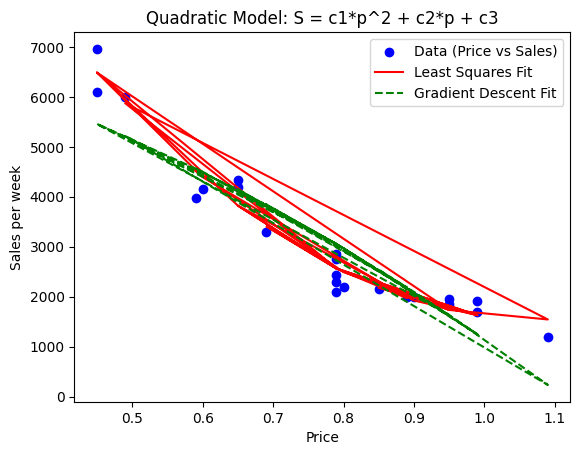

In [12]:
plt.scatter(x, y, color='blue', label="Data (Price vs Sales)")
plt.plot(x, y_ls2, color='red', label="Least Squares Fit")
plt.plot(x, y_gd2, color='green', linestyle="--", label="Gradient Descent Fit")

plt.xlabel("Price")
plt.ylabel("Sales per week")
plt.title("Quadratic Model: S = c1*p^2 + c2*p + c3")
plt.legend()
plt.show()

In [13]:
def compute_errors(y_true, y_pred):
    """Computes RSS, MSE, RMSE, and R² for given predictions."""
    rss = np.sum((y_true - y_pred) ** 2)
    mse = rss / len(y_true)
    rmse = np.sqrt(mse)
    r2 = 1 - (rss / np.sum((y_true - np.mean(y_true)) ** 2))
    
    return {"RSS": rss, "MSE": mse, "RMSE": rmse, "R2": r2}

errors_ls_lin = compute_errors(y, y_ls1)
errors_gd_lin = compute_errors(y, y_gd1)

errors_ls_quad = compute_errors(y, y_ls2)
errors_gd_quad = compute_errors(y, y_gd2)

/var/folders/1d/12l7nzys7t3dz14hd0g37gkm0000gn/T/ipykernel_85111/3243798313.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=30, ha="right")
/var/folders/1d/12l7nzys7t3dz14hd0g37gkm0000gn/T/ipykernel_85111/3243798313.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=30, ha="right")
/var/folders/1d/12l7nzys7t3dz14hd0g37gkm0000gn/T/ipykernel_85111/3243798313.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=30, ha="right")
/var/folders/1d/12l7nzys7t3dz14hd0g37gkm0000gn/T/ipykernel_85111/3243798313.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

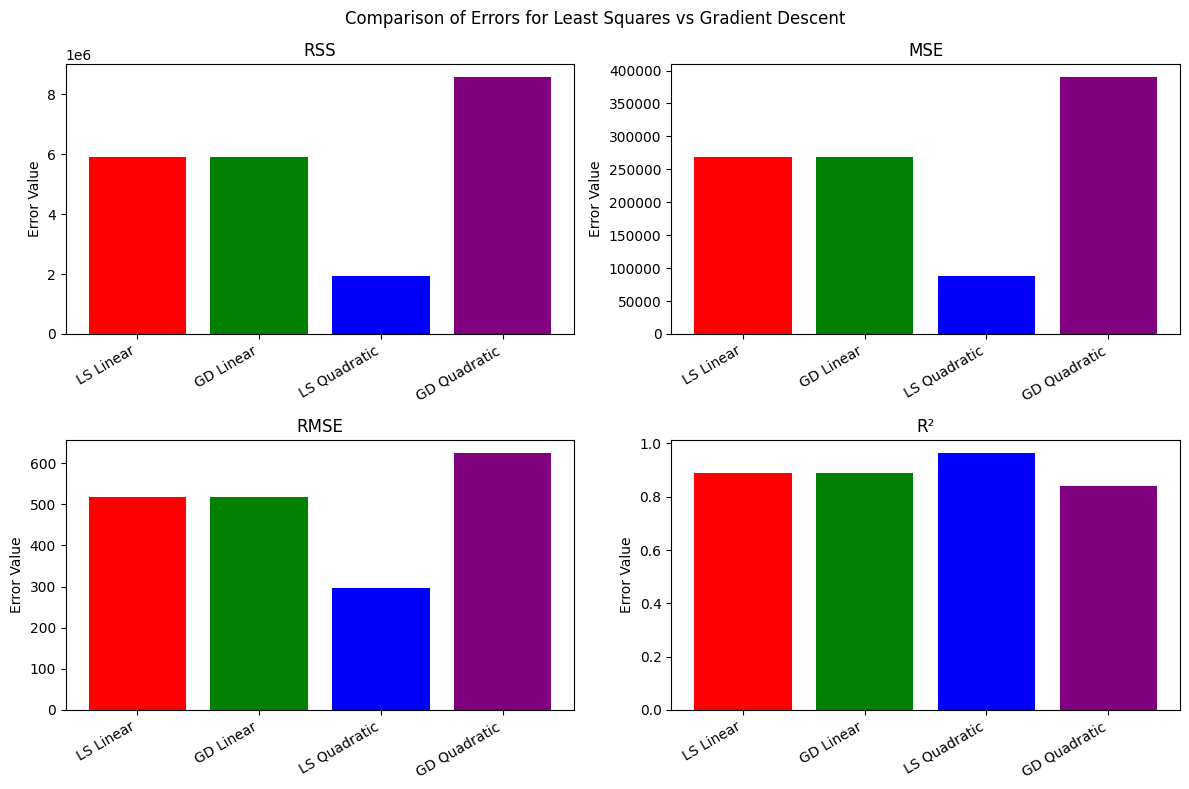

In [14]:
# ---- Bar Plot for Error Comparison ----
labels = ["RSS", "MSE", "RMSE", "R²"]
methods = ["LS Linear", "GD Linear", "LS Quadratic", "GD Quadratic"]

# Extracting values
error_values = np.array([
    list(errors_ls_lin.values()),
    list(errors_gd_lin.values()),
    list(errors_ls_quad.values()),
    list(errors_gd_quad.values())
])

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    ax.bar(methods, error_values[:, i], color=["red", "green", "blue", "purple"])
    ax.set_title(labels[i])
    ax.set_ylabel("Error Value")
    ax.set_xticklabels(methods, rotation=30, ha="right")

plt.suptitle("Comparison of Errors for Least Squares vs Gradient Descent")
plt.tight_layout()
plt.show()